###  TensorFlow

- 편미분의 특성을 그래프로 표현하면 유용하다
- 자동화
- activation func : 선형화 되는 것을 막기 위해 비선형화

In [1]:
import numpy as np 

raw_data = np.genfromtxt('/home/dev_ws/DL/data/x09.txt', skip_header = 36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

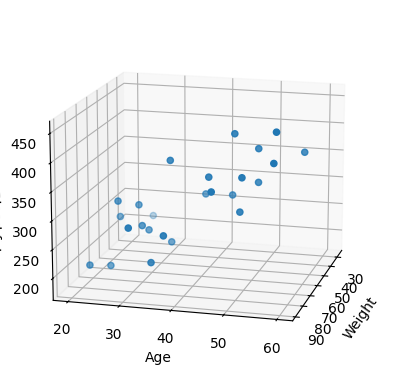

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
%matplotlib inline 

xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [3]:
x_data = np.array(raw_data[:, 2:4], dtype = np.float32)
y_data = np.array(raw_data[:,4], dtype = np.float32)

y_data = y_data.reshape((25, 1))

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))
])

model.compile(optimizer = 'rmsprop', loss = 'mse')

2024-02-26 11:37:32.834953: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 11:37:32.865411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:37:32.865458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 11:37:32.866139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 11:37:32.871268: I tensorflow/core/platform/cpu_feature_guar

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 목표

- 현재 우리는 나이와 몸무게를 받아서 Blood fat을 추정하는 모델을 학습을 통해 얻을려고 한다
- 모델 구성하였고 모델의 loss function을 선정하고, loss의 감소를 위한 optimizer도 선정을 했다

### 학습

In [6]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 631ms/step - loss: 160803.0469
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 160525.5469
Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 160324.4531
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 160156.2188
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 160006.9844
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 159870.2969
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 159742.5938
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 159621.6406
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 159505.9062
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 159394.3750
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 159286.2656
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss:

2024-02-26 11:37:35.099682: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa02cb3e520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 11:37:35.099705: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 11:37:35.105225: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-26 11:37:35.115110: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708915055.163458    7897 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 5ms/step - loss: 158780.2344
Epoch 17/5000
1/1 [==============================] - 0s 5ms/step - loss: 158683.7812
Epoch 18/5000
1/1 [==============================] - 0s 4ms/step - loss: 158588.4531
Epoch 19/5000
1/1 [==============================] - 0s 7ms/step - loss: 158494.0938
Epoch 20/5000
1/1 [==============================] - 0s 4ms/step - loss: 158400.5938
Epoch 21/5000
1/1 [==============================] - 0s 5ms/step - loss: 158307.8438
Epoch 22/5000
1/1 [==============================] - 0s 5ms/step - loss: 158215.7500
Epoch 23/5000
1/1 [==============================] - 0s 4ms/step - loss: 158124.2812
Epoch 24/5000
1/1 [==============================] - 0s 5ms/step - loss: 158033.2812
Epoch 25/5000
1/1 [==============================] - 0s 4ms/step - loss: 157942.7969
Epoch 26/5000
1/1 [==============================] - 0s 5ms/step - loss: 157852.7031
Epoch 27/5000
1/1 [==============================] - 0s 4ms/step - loss: 157763

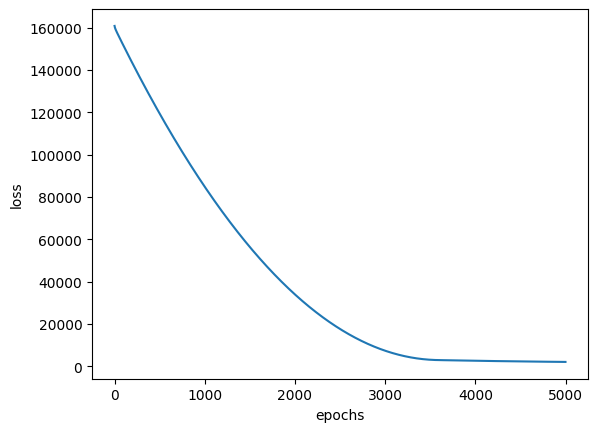

In [7]:
plt.plot(hist.history['loss'])
plt.xlabel('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### 몸무게 100에 44살 된 사람의 이 데이터에서의 Blood Fat은?

In [8]:
model.predict(np.array([100, 44]).reshape(1, 2))


1/1 [==============================] - 0s 72ms/step


array([[390.26263]], dtype=float32)

In [9]:
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 19ms/step


array([[230.15045]], dtype=float32)

In [10]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[1.9695369]
 [4.280563 ]]
bias is :  [4.964174]


### 모델이 잘 만들어졌는지 확인하기 위해 데이터 만들기

In [11]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis = 1)
Z = np.matmul(X, W_) + b_

### 그려보기

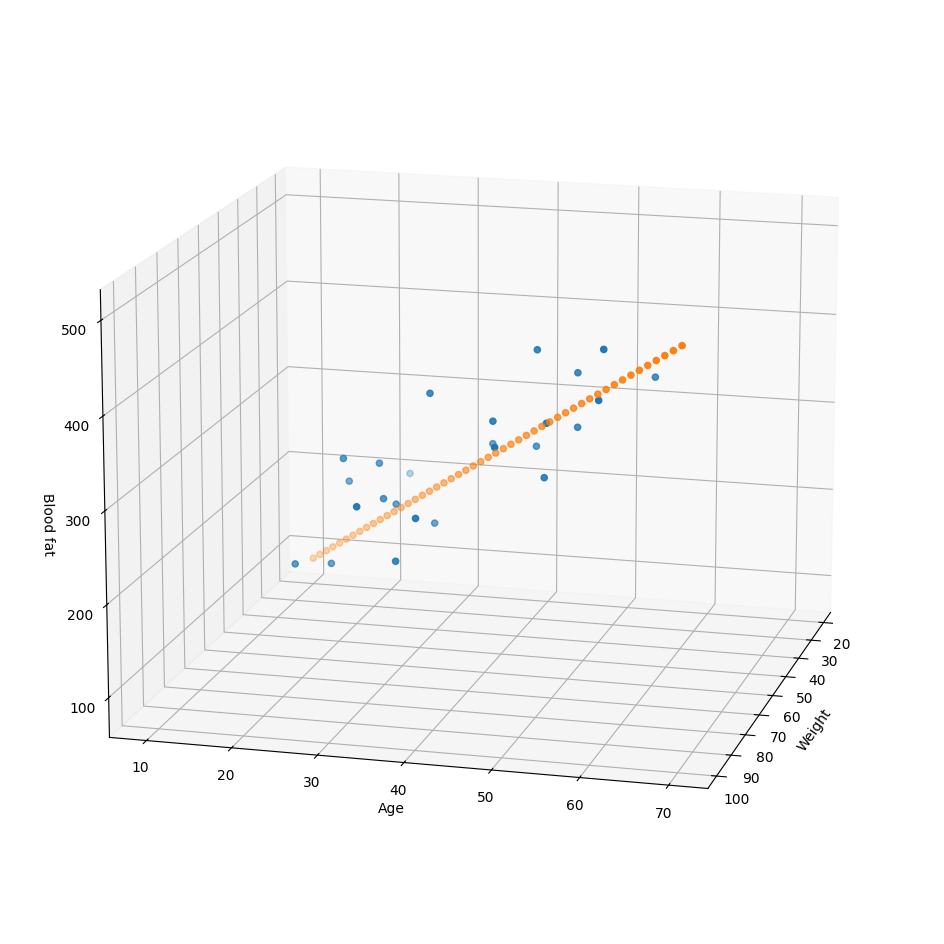

In [12]:
fig = plt.figure(figsize = (12, 12))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

## XOR 문제

In [13]:
import numpy as np 

X = np.array([ [0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation = 'sigmoid', input_shape = (2, )),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습

In [17]:
hist = model.fit(X, y, epochs = 5000, batch_size= 1)

Epoch 1/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3172
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3166
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3154
Epoch 5/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3148
Epoch 6/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3142
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3136
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3130
Epoch 9/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.3124
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3118
Epoch 11/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3112
Epoch 12/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3106
Epoch 13/5000
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 906/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 907/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 908/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 909/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 910/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 911/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 912/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 913/5000
4/4 [==============================] - 0s 9ms/step - loss: 0.2496
Epoch 914/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.2496
Epoch 915/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.2496
Epoch 916/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 917/5000
4/4 [=======================

### 학습 결과

In [18]:
model.predict(X)

1/1 [==============================] - 0s 48ms/step


array([[0.51436025],
       [0.53242433],
       [0.4884354 ],
       [0.46992776]], dtype=float32)

### loss 상황

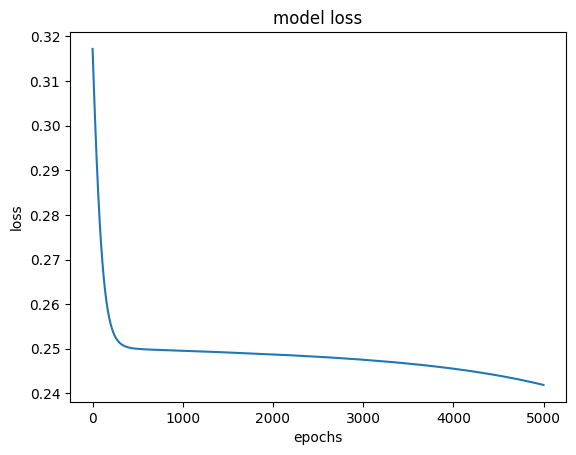

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.show()

### 학습에서 찾은 가중치

In [20]:
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.7507684,  0.9019559],
       [ 0.5455476, -1.4296315]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-0.45313865, -0.7373099 ], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[1.1698786],
       [1.182057 ]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.77968025], dtype=float32)>


## Iris 데이터

### sparse matrix
[0 0 0; 0 1 0; 0 0 0]  ->  (2, 2, 1)


In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

### sklearn의 one hot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
enc.fit(y.reshape(len(y), 1 ))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [28]:
enc.categories_

[array([0, 1, 2])]

In [29]:
y_one_hot = enc.transform(y.reshape(len(y), 1))
y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 13)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape = (4, ), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

### summary 결과

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                160       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습

In [36]:
hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 2s 9ms/step - loss: 1.7676 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3735 - accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1619 - accuracy: 0.3500
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0669 - accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0169 - accuracy: 0.3250
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9855 - accuracy: 0.3083
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9613 - accuracy: 0.3083
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9359 - accuracy: 0.3083
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9085 - accuracy: 0.3167
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8804 - accuracy: 0.6167
Epoch 11/100
4/4 [===========

### test 데이터에 대한 accuracy

In [37]:
model.evaluate(X_test, y_test, verbose = 2)

1/1 - 0s - loss: 0.1086 - accuracy: 1.0000 - 105ms/epoch - 105ms/step


[0.1086428165435791, 1.0]

### loss와 acc의 변화

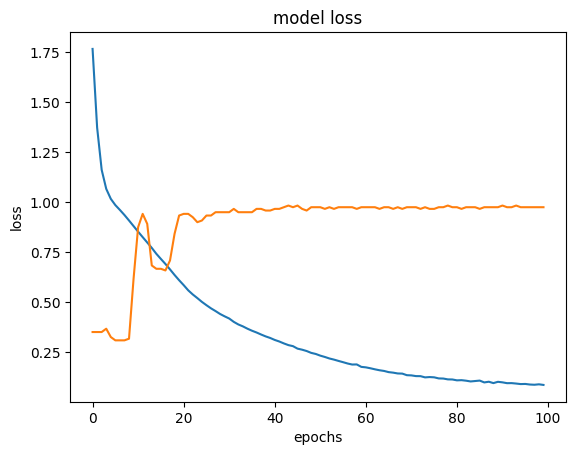

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()